In [1]:
# Import relevant modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cfeature           # import features
from matplotlib.patches import Rectangle

import uuid
from scipy import interpolate
import scipy.io
from glob import glob
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib
sorted_classes = [3,6,11,1,9,5,12,4,2,7,8,10]

# defining color dictionary for the classes 
Dict_classes = {'color_12':'#B8000F',
                'name_12':'low-level 2',
                'color_4':'#D53A47',
                'name_4':'low-level 3',
                'color_5':'#F37C86',
                'name_5':'low-level 1', 
                'color_6':'#93C9EF',
                'name_6':'high-level 2',
                'color_3':'#B0D9F6',
                'name_3':'high-level 1',
                'color_2':'#000000',
                'name_2':'clear-sky dominated 1', 
                'color_10':'#D5DEE5',
                'name_10':'clear-sky dominated 4',
                'color_8':'#A1A7AC',
                'name_8':'clear-sky dominated 3',
                'color_7':'#707579',
                'name_7':'clear-sky dominated 2',
                'color_9':'#5790B4',
                'name_9':'convective 3',
                'color_11':'#026BAC',
                'name_11':'convective 1',
                'color_1':'#059DFC', 
                'name_1':'convective 2',
               }



def approx_calc_crop_edge_latlon(lat_crop_center, lon_crop_center, crop_size_lat, crop_size_lon):
    '''
    function to calculate approximate crop edges of lat lon based on the approximated formulas linking lat/lon degrees to km.
    input:
    crop_center_x: lon position of the crop center (degrees)
    crop_center_y: lat position of the crop center (degrees)
    crop_size_x: extension in km of the crop along longitudes 
    crop_size_y: extension in km of the crop along longitudes
'''
    lat_deg = 110.574 # 1 deg of latitude in km
    def lon_deg(lat_deg):
        return(111.320*np.cos(lat_deg* np.pi / 180) )
    
    half_crop_lat = crop_size_lat/2.
    half_crop_lon = crop_size_lon/2.
    
    print('half crop in km for longitude', half_crop_lon)
    
    # deriving width in latitude associated the crop size.
    lat_half_width = half_crop_lat/lat_deg
    lat_width = crop_size_lat/lat_deg

    # calculating positions of the edges of the crops in lat degrees
    lat_top = lat_crop_center + lat_half_width
    lat_bottom = lat_crop_center - lat_half_width
    lats = [lat_top, lat_bottom]
    
    # derive lon of the top and the bottom
    lon_left_bottom = lon_crop_center - half_crop_lon/lon_deg(lat_bottom)
    lon_left_top = lon_crop_center - half_crop_lon/lon_deg(lat_top)
    lon_right_bottom = lon_crop_center + half_crop_lon/lon_deg(lat_bottom)
    lon_right_top = lon_crop_center + half_crop_lon/lon_deg(lat_top)
    
    lon_width = lon_right_top - lon_left_top

    # write coordinates of the edges (top-left, top_right, bottom_right, bottom_left)
    edges_coords_lats = [lat_top, lat_top, lat_bottom, lat_bottom, lat_width]
    edges_coords_lons = [lon_left_top, lon_right_top, lon_right_bottom, lon_left_bottom, lon_width]
    
    
    # calculating lons at the selected lats edges
    #lon_dist_top = longDistance / (111.320 * cos(lat * np.pi / 180))
    return(edges_coords_lats, edges_coords_lons)


# define area of work for the project
area_str = 'IDEA-S4S'; area_name = 'Alpine domain'
minlon = 5.; maxlon = 16.; minlat = 42.; maxlat = 51.5;
extent_param = [minlon, maxlon, minlat, maxlat]

def draw_crop_border(crop_center_x, crop_center_y, crop_size):
    crop_border = np.zeros((2,5))
    x_left = crop_center_x - crop_size/2
    x_right= crop_center_x + crop_size/2
    y_upper = crop_center_y + crop_size/2
    y_lower = crop_center_y - crop_size/2
    
    # get border of crop
    crop_border[0] = np.array([x_left, x_left, x_right, x_right, x_left])
    crop_border[1] = np.array([y_lower, y_upper, y_upper, y_lower, y_lower])
    
    plt.plot(crop_border[0], crop_border[1], linewidth=50, color='black')

    return()

# definition of parameters for running
crop_size = 128
size_x_km = 260
size_y_km = 135
path_out = '/Users/claudia/Desktop/class_time_series/'


/Users/claudia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
crop_names = ['crop0', 'crop1', 'crop2']

crop_lats = []
crop_lons = []
crop_time = []
crop_label = []
for ind_crop, crop in enumerate(crop_names):

    # reading crop data
    path_to_csv = '/Users/claudia/Desktop/'
    dfp = pd.read_csv(path_to_csv+'2015_may-sep_alps_128_k12_casestudy_20150708_'+crop+'.csv')
    csv_data = dfp.to_xarray()
    
    # reading crop labels and time stamps
    time = pd.to_datetime(csv_data.datetime.values)
    label = csv_data.label.values


    if crop == 'crop0':
        pix_x=682
        pix_y=171
        lon_center_crop = 14.238718
        lat_center_crop = 46.65706

    elif crop == 'crop1':
        pix_x = 48    
        pix_y = 229
        lon_center_crop = 11.530309
        lat_center_crop = 45.708935

    elif crop == 'crop2':
        pix_x = 585
        pix_y = 200
        lon_center_crop = 12.862881
        lat_center_crop = 46.17725

    lats, lons = approx_calc_crop_edge_latlon(lat_center_crop, lon_center_crop, size_y_km, size_x_km)
    print(len(time))
    crop_lats.append(lats)
    crop_lons.append(lons)
    crop_time.append(time)
    crop_label.append(label)
    


FileNotFoundError: [Errno 2] No such file or directory: '/Users/claudia/Desktop/2015_may-sep_alps_128_k12_casestudy_20150708_crop0.csv'


    
    
for ind_time in range(len(crop_label[0][:])):
        
    # Plot the map of MSG channels vs lat/lon
    crs = ccrs.PlateCarree()

    fig = plt.figure(figsize=(14,14))
    ax = fig.add_subplot(1, 1, 1, projection=crs)
    ax.spines["top"].set_linewidth(3)
    ax.spines["right"].set_linewidth(3)
    ax.spines["bottom"].set_linewidth(3)
    ax.spines["left"].set_linewidth(3)

    ax.set_extent(extent_param)


    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.2)
    ax.add_feature(cfeature.BORDERS, linewidth=1.)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'fontsize': 14}
    gl.ylabel_style = {'fontsize': 14}

    #vmin, vmax=220.,
    plt.tick_params(axis='both',which='major',labelsize=14)

    ax.set_xlabel('Latitude [$^{\circ}$]')
    ax.set_ylabel('Longitude [$^{\circ}$]')
    ax.tick_params(which='minor', length=5, width=2)
    ax.tick_params(which='major', length=7, width=3)
    
    for ind in range(len(crop_lats)):
        
        lats = crop_lats[ind]
        lons = crop_lons[ind]
        # reading time stamo and values for the crop
        labels = crop_label[ind][ind_time]
        ax.text(9.2, 51., crop_time[0][ind_time],\
                    style='italic', fontsize=14)
        ax.add_patch(Rectangle((lons[3], lats[3]), 
                                 lons[4], lats[4],
                                fc=Dict_classes['color_'+str(labels)],
                                color =Dict_classes['color_'+str(labels)],
                                linewidth = 5,
                                linestyle="solid", ) )
        #ax.add_patch(Rectangle((5.5, 45.), 
        #                         3.5, 6.5,
        #                        fc='white',
         #                       color ='white',
        #                        linewidth = 5,
        #                        linestyle="solid", ) )
        #       
        #delta = np.arange(12)
       # for i_legend,ind_class in enumerate(sorted_classes):
       #     ax.add_patch(Rectangle((5.7, 51.-delta[i_legend]*0.5), 
       #                          0.3, 0.3,
       #                          fc=Dict_classes['color_'+str(ind_class)],
       #                          color =Dict_classes['color_'+str(ind_class)],
       #                          linewidth = 5,
       #                          linestyle="solid", ) )
       #     ax.text(6.4, 51.-delta[i_legend]*0.5, Dict_classes['name_'+str(ind_class)],\
       #             style='italic', fontsize=14)
    figure_name = str(ind_time)+'_classes_time_serie.png'
    fig.savefig(path_out+figure_name, transparent='true')
    

In [11]:
import matplotlib.pyplot as plt
import imageio

frames = []
for t in range(131):
    #print(str(t))
    image = imageio.v2.imread(path_out+str(t)+'_classes_time_serie.png')
    frames.append(image)
    
imageio.mimsave(path_out+'classes_time_series.gif', # output gif
                frames)         # optional: frames per second

NameError: name 'ind_time' is not defined

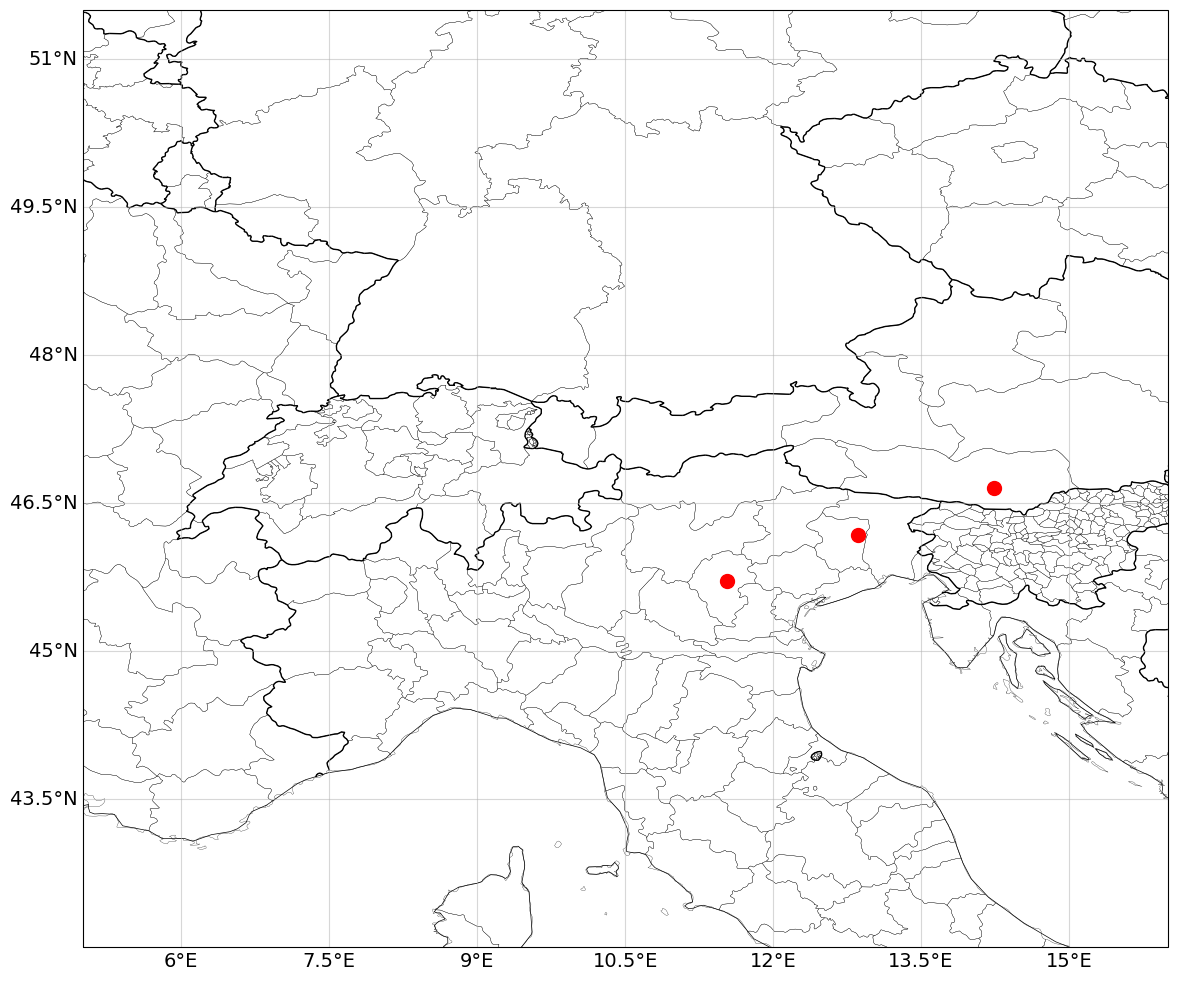

In [4]:
    
# Plot the map of MSG channels vs lat/lon
crs = ccrs.PlateCarree()

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1, projection=crs)
ax.spines["top"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.set_extent(extent_param)


ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.2)
ax.add_feature(cfeature.BORDERS, linewidth=1.)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 14}
gl.ylabel_style = {'fontsize': 14}

#vmin, vmax=220.,
plt.tick_params(axis='both',which='major',labelsize=14)

ax.set_xlabel('Latitude [$^{\circ}$]')
ax.set_ylabel('Longitude [$^{\circ}$]')
ax.tick_params(which='minor', length=5, width=2)
ax.tick_params(which='major', length=7, width=3)
 
for i, crop in enumerate(crop_names):
    if crop == 'crop0':
        pix_x=682
        pix_y=171
        lon_center_crop = 14.238718
        lat_center_crop = 46.65706

    elif crop == 'crop1':
        pix_x = 48    
        pix_y = 229
        lon_center_crop = 11.530309
        lat_center_crop = 45.708935

    elif crop == 'crop2':
        pix_x = 585
        pix_y = 200
        lon_center_crop = 12.862881
        lat_center_crop = 46.17725

    ax.scatter(lon_center_crop, lat_center_crop, s=100, color='red')

figure_name = str(ind_time)+'crops_centers.png'
fig.savefig(path_out+figure_name, transparent='true')


crop0
crop1
crop2


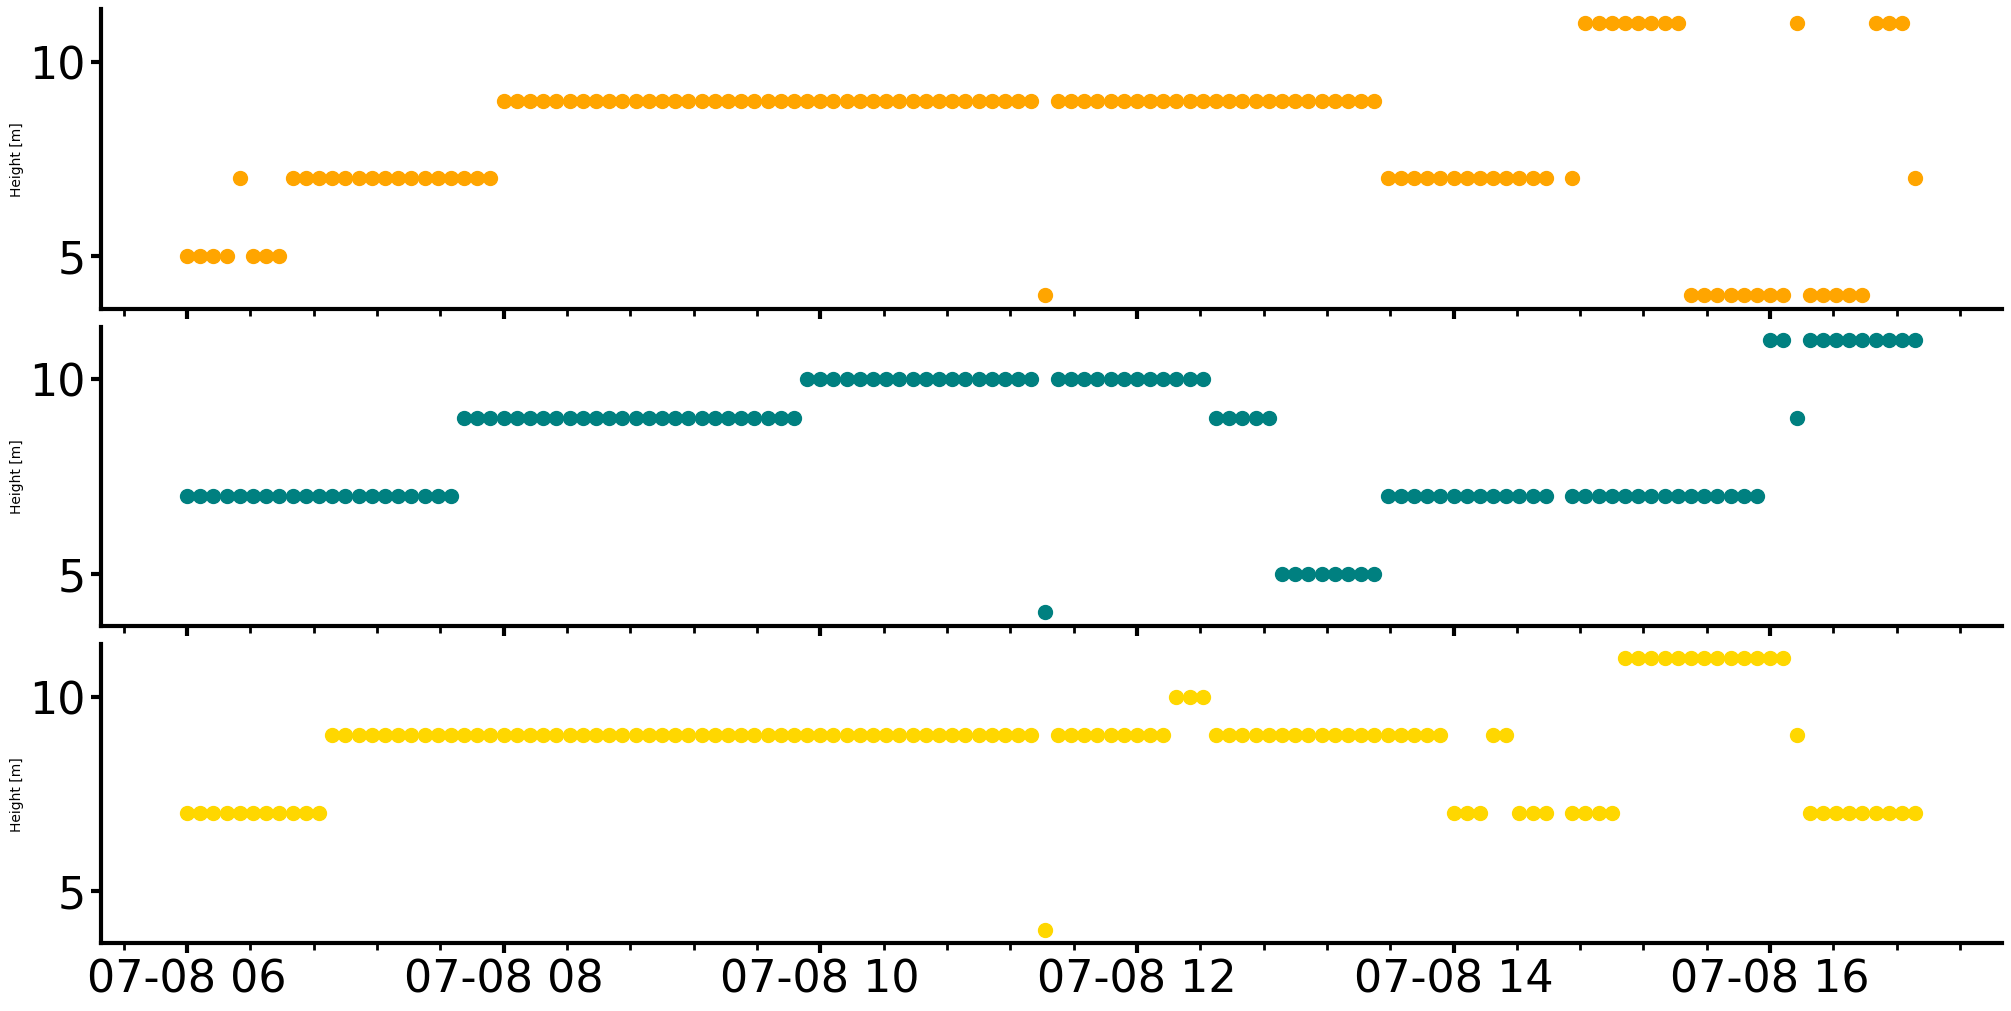

In [3]:
crop_colors = ['orange', 'teal', 'gold']
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
fig, axs = plt.subplots(3,1, figsize=(20,10), sharex=True, sharey=True, constrained_layout=True)

for ind_crop, crop in enumerate(crop_names):
    print(crop)
    
    
    # reading crop data
    path_to_csv = '/Users/claudia/Desktop/'
    dfp = pd.read_csv(path_to_csv+'2015_may-sep_alps_128_k12_casestudy_20150708_'+crop+'.csv')
    csv_data = dfp.to_xarray()
    
    # reading crop labels and time stamps
    time = pd.to_datetime(csv_data.datetime.values)
    label = csv_data.label.values

    axs[ind_crop].scatter(time, label, s=100, c=crop_colors[ind_crop])
    ax = axs[ind_crop]
    #ax.set_xlim(SST_binned_arr[0]-0.1, SST_binned_arr[-1]+0.1)
    #ax.text(-0.05, 1.1, l,  fontweight='black', fontsize=fontSizeX, transform=ax.transAxes)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(3)
    ax.spines["left"].set_linewidth(3)
    ax.set_ylabel('Height [m]')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    ax.tick_params(which='minor', length=5, width=2)
    ax.tick_params(which='major', length=7, width=3)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    ax.tick_params(axis='both', labelsize=32)  
    #ax/grid()